# Forecasts and Predictions

## Project description


The gym chain Model Fitness wants to apply data analysis to develop customer interaction strategy.<br> 
First task on this path is to analyze customer's churn.<br>  
In order to understand this problem, Model Fitness has digitized a number of its customer profiles.<br> 
Our task as analytics is to explore them and come up with a customer retention strategy.<br> 

Our Analytical Project in Steps:
* Learn to predict the probability of churn (for the upcoming month) for each customer
* Draw up typical user portraits: select the most outstanding groups and describe their main features
* Analyze the factors that impact churn most
* Draw basic conclusions and develop recommendations on how to improve customer service:
   * Identify target groups
   * Suggest measures to cut churn





In [1]:
#load all the libraries
import pandas as pd
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
from scipy import stats as st
import numpy as np
import math as mth
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#download datasets using try-except statment
try:
    gym = pd.read_csv('gym_churn_us.csv')
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
#general information about the dataset
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#general information about the dataset
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [5]:
#checking duplicates
gym.duplicated().sum()

0

In [6]:
#samples of the dataset
gym.head()
gym.tail()
gym.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2897,1,1,1,1,1,12,1,31,16.439138,3.0,9,2.481678,2.443623,0
691,1,1,0,0,1,1,0,27,74.531013,1.0,4,1.508543,0.633227,1
902,0,0,0,0,1,1,0,31,71.479108,1.0,4,4.698029,4.482545,0
2417,1,1,0,0,1,6,1,30,203.405400,6.0,1,2.313525,2.325036,0
2974,0,1,0,0,1,1,1,30,11.843243,1.0,11,3.001518,3.045319,0


### Description of the data

The database includes the following fields:<br>
* User data for the preceding month<br>
`gender`<br>
`Near_Location` — whether the user lives or works in the neighborhood where the gym is located<br>
`Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)<br>
`Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)<br>
`Phone` — whether the user provided their phone number<br>
`Age`<br>
`Lifetime` — the time (in months) since the customer first came to the gym<br>
* Data from the log of visits and purchases and data on current membership status<br>
`Contract_period` — 1 month, 3 months, 6 months, or 1 year<br>
`Month_to_end_contract` — the months remaining until the contract expires<br>
`Group_visits` — whether the user takes part in group sessions<br>
`Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime<br>
`Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month<br>
`Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.<br>
`Churn` — the fact of churn for the month in question<br>

### What do we see in the data?

1. The dataset consists of 14 columns and 4000 rows.
2. There are no missing values in the dataset.
3. There are no duplicate values in the dataset.
4. For better clarity and convenience, it is recommended to transform column names to lowercase.

In [7]:
#renaming the columns
gym.columns = gym.columns.str.lower()
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## EDA

### General distribution

Now we need to take a more detailed look at the features distribution.

In [8]:
#dividing features into two parts - one for categorical values and the other for continuous.
values = ['gender', 
          'near_location', 
          'partner', 
          'promo_friends', 
          'phone', 
          'group_visits', 
          'contract_period',
          'churn']
hist = ['age', 
        'avg_additional_charges_total', 
        'month_to_end_contract', 
        'lifetime', 
        'avg_class_frequency_total', 
        'avg_class_frequency_current_month']

#creating a function for distribution
def distribution(df):
    for i in df.columns:
        if i in values:
            print('The distribution of: {}'.format(i))
            print(df[i].value_counts(normalize=True).map('{:.0%}'.format))
            print('------------------NEXT-COLUMN------------------------------------------')
        elif i in hist:
            print('The histogram of: {}'.format(i))
            sns.histplot(df[i], color = 'green', alpha = 0.5)
            plt.show()
            print('------------------NEXT-COLUMN------------------------------------------');

The distribution of: gender
1    51%
0    49%
Name: gender, dtype: object
------------------NEXT-COLUMN------------------------------------------
The distribution of: near_location
1    85%
0    15%
Name: near_location, dtype: object
------------------NEXT-COLUMN------------------------------------------
The distribution of: partner
0    51%
1    49%
Name: partner, dtype: object
------------------NEXT-COLUMN------------------------------------------
The distribution of: promo_friends
0    69%
1    31%
Name: promo_friends, dtype: object
------------------NEXT-COLUMN------------------------------------------
The distribution of: phone
1    90%
0    10%
Name: phone, dtype: object
------------------NEXT-COLUMN------------------------------------------
The distribution of: contract_period
1     55%
12    24%
6     21%
Name: contract_period, dtype: object
------------------NEXT-COLUMN------------------------------------------
The distribution of: group_visits
0    59%
1    41%
Name: group_vi

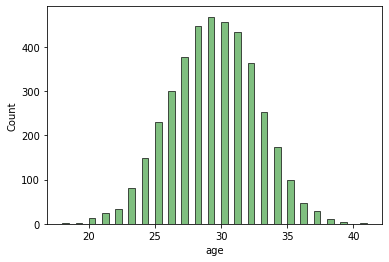

------------------NEXT-COLUMN------------------------------------------
The histogram of: avg_additional_charges_total


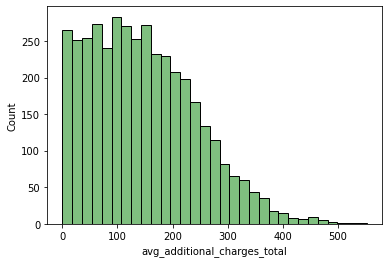

------------------NEXT-COLUMN------------------------------------------
The histogram of: month_to_end_contract


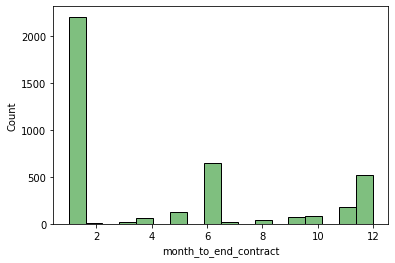

------------------NEXT-COLUMN------------------------------------------
The histogram of: lifetime


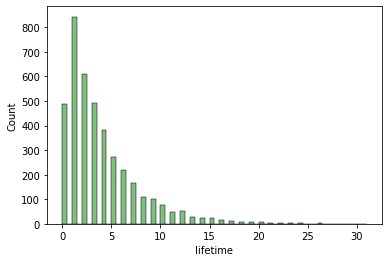

------------------NEXT-COLUMN------------------------------------------
The histogram of: avg_class_frequency_total


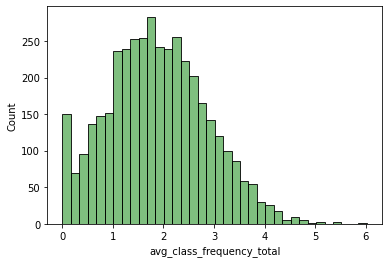

------------------NEXT-COLUMN------------------------------------------
The histogram of: avg_class_frequency_current_month


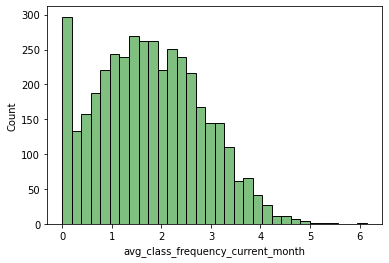

------------------NEXT-COLUMN------------------------------------------
The distribution of: churn
0    73%
1    27%
Name: churn, dtype: object
------------------NEXT-COLUMN------------------------------------------


In [9]:
#calling the function
distribution(gym)

* The gender distribution is almost equal, with 51% of our customers being men and 49% women.

* 85% of our customers live near the fitness center they attend.

* Just over half (51%) of our customers are employees of partner companies. 

* 69% of our customers were brought to us by a friend through a promo.

* 90% of our customers have provided their phone numbers.

* Just over half of our customers (55%) have signed up for a one-month membership, while 21% have opted for a six-month plan, and 24% have committed to a year-long membership.

* 59% of our customers attend group classes.


* The age of our customers varies from 18 to 41 years old, with a mean age of 29 years.
* While some of our clients spend additional money in our establishments, with some exceeding 500 usd over the course of their membership, the average expenditure is 96 usd for the entire membership period.
* Out of the 4,000 customers in this dataset, over 2,000 have just one month left on their contracts, which aligns with the fact that 55% of our members opt for a one-month subscription.
* The customer lifetime ranges from 0 to 31 months, with a mean of 3.7 months and a median of 3 months, indicating that 50% of our clients stay for less than 3 months.
* The average weekly activity during a customer's lifetime ranges from 0 to 6 visits per week, with a mean of 1.9 visits. The majority (75%) of our customers visit the fitness center 2.5 times per week or less.
* The weekly activity in the last month follows a similar pattern, ranging from 0 to 6 visits per week, with a mean of 1.8 visits. Again, the majority (75%) of our customers visit the fitness center 2.5 times per week or less.

* 27% of our customers in this dataset have churned.

### Churn/Non-churn general distribution

Let's examine the feature's mean values for two groups: not churned and churned customers.

In [10]:
#calculating feature's mean values for not churned and churned customers
mean = gym.groupby('churn').mean().reset_index()
mean.T

,0,1
churn,0.000000,1.000000
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899


* As we can see, there is no significant difference in the mean values of gender, near_location, and phone for churned and non-churned customers.
* 53% of loyal customers and 35% of churned ones are employees of partner companies.
* 35% of loyal customers and 18% of churned ones were brought in through friend's promos.
* The average contract period is significantly longer for customers who stayed, at 5.7 months, compared to 1.7 months for churned customers.
* 46% of non-churned customers attend group sessions compared to 27% of churned customers.
* Staying customers tend to spend more money, with a mean expenditure of 156 USD, compared to 115 USD for churned customers.
* The average number of months until the end of the contract is also higher for non-churned customers, standing at 5.2 months, in contrast to 1.6 months for those who left.
* Lifetime data follows a similar pattern - the average lifetime for staying customers is 4.7 months, whereas for leaving customers, it's just one month.
* The average weekly activity during a customer's lifetime is higher for non-churned customers, at 2 times a week, compared to churned customers with 1.5 times a week.
* Furthermore, the average weekly activity during the last month for churned customers is even lower, dropping to 1 time a week on average.


Now let's take a look at the actual features distribution for churned and not churned customers.

In [11]:
#dividing the dataset into two parts
not_churn = gym.query('churn == 0')
churn = gym.query('churn == 1')

In [12]:
#adjusting the function
def distribution_2(df_1, df_2):
    for i in df_1.columns:
        if i in values:
            print('The distribution of: {}'.format(i))
            print('Not churned clients')
            print(df_1[i].value_counts(normalize=True).map('{:.0%}'.format))
            print('Churned clients')
            print(df_2[i].value_counts(normalize=True).map('{:.0%}'.format))
            print('-------------------------------------------------------------------------------------')
        elif i in hist:
            print('The histogram of: {}'.format(i))
            sns.histplot(df_1[i], color = 'green', alpha = 0.5, label = 'Not churned')
            sns.histplot(df_2[i], color = 'red', alpha = 0.5, label = 'Churned')
            plt.legend()
            plt.show()
            print('--------------------------------------------------------------------------------------');

The distribution of: gender
Not churned clients
1    51%
0    49%
Name: gender, dtype: object
Churned clients
1    51%
0    49%
Name: gender, dtype: object
-------------------------------------------------------------------------------------
The distribution of: near_location
Not churned clients
1    87%
0    13%
Name: near_location, dtype: object
Churned clients
1    77%
0    23%
Name: near_location, dtype: object
-------------------------------------------------------------------------------------
The distribution of: partner
Not churned clients
1    53%
0    47%
Name: partner, dtype: object
Churned clients
0    64%
1    36%
Name: partner, dtype: object
-------------------------------------------------------------------------------------
The distribution of: promo_friends
Not churned clients
0    65%
1    35%
Name: promo_friends, dtype: object
Churned clients
0    82%
1    18%
Name: promo_friends, dtype: object
-------------------------------------------------------------------------

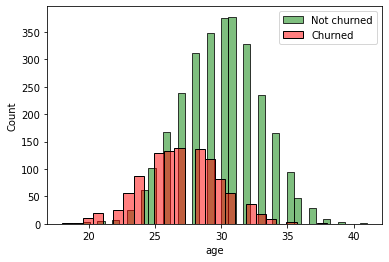

--------------------------------------------------------------------------------------
The histogram of: avg_additional_charges_total


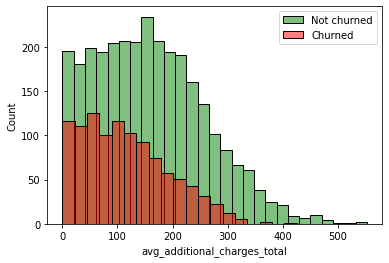

--------------------------------------------------------------------------------------
The histogram of: month_to_end_contract


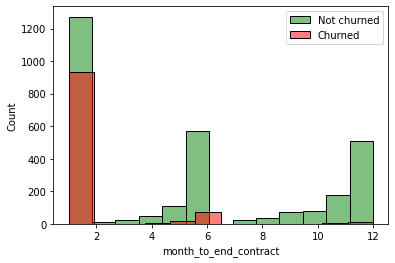

--------------------------------------------------------------------------------------
The histogram of: lifetime


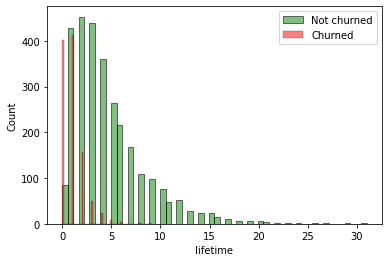

--------------------------------------------------------------------------------------
The histogram of: avg_class_frequency_total


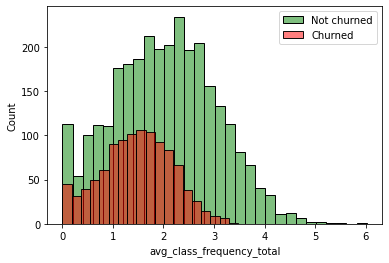

--------------------------------------------------------------------------------------
The histogram of: avg_class_frequency_current_month


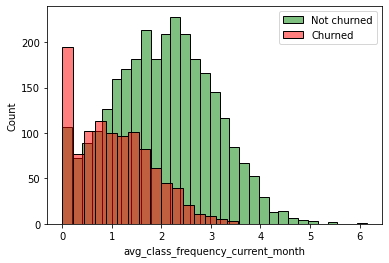

--------------------------------------------------------------------------------------
The distribution of: churn
Not churned clients
0    100%
Name: churn, dtype: object
Churned clients
1    100%
Name: churn, dtype: object
-------------------------------------------------------------------------------------


In [13]:
#calling the function
distribution_2(not_churn, churn)

Looking at the real features distribution we can add some more insights. 
* 88% of churned customers originally signed up for just one month, while the percentage of loyal customers who signed a one-month contract is half that, at 43%. 
* Churned customers tend to be younger, with a majority falling in the 25-30 age range, while loyal customers are typically aged between 25-35.
* Overall, churned customers tend to spend less additional money, with the majority spending less than 200 USD for the entire membership period, whereas most of the loyal customers spend less than 300 USD.<br> 

But we believe that collecting spending data on a monthly basis (not for the entire period of membership) is essential because customers typically spend less during one- or three-month memberships compared to those with memberships lasting over one year.

* Most of the churned customers have only one month left until the end of their contracts, which aligns with the data showing that they predominantly sign up for one-month memberships.
* The lifetime of churned customers is significantly shorter, up to 9 months, with the majority having a lifetime of just one month. In contrast, loyal customers have a longer lifetime, reaching up to 31 months, with the majority having a lifetime of 6 months and counting up.
* Average weekly activity during a customer's lifetime is higher for non-churned customers, spanning from 0 to 6 times a week, with the majority visiting up to 3 times a week. In contrast, for churned customers, this range is shorter, ranging from 0 to 3.5 times a week, with the majority visiting no more than 2 times a week.
* The situation becomes even more pronounced when we examine the average weekly activity during the last month. The number of churned customers who didn't visit at all is greater than that of the loyal customers, despite the overall number of churned customers being three times smaller. Even though the ranges for average weekly activity remain consistent for both groups, the majority of loyal customers continue to visit up to 3 times a week, while the majority of churned customers visit less frequently, typically up to 1.5 times a week.

Now let's build a correlation matrix in order to see how much features correlate with each other and most importantly with the fact that customer churned or not.

### Correlation matrix

In [14]:
#biulding correlation matrix
cm = gym.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


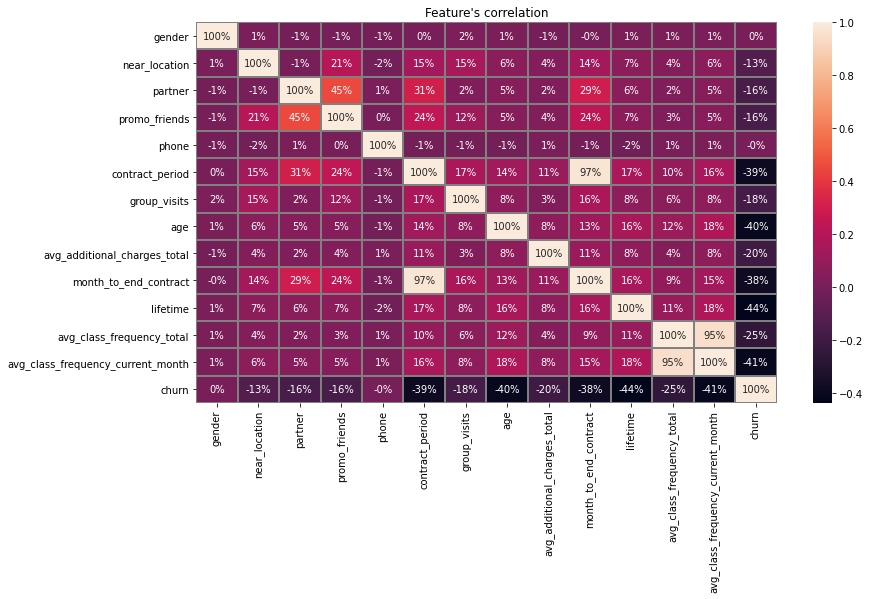

In [15]:
#ploting heatmap
plt.figure(figsize=(13, 7))
plt.title("Feature's correlation")
sns.heatmap(
    cm,
    annot=True,
    fmt='.0%',
    linewidths=1,
    linecolor='gray',
);

First of all, we don't see any strong correlation between features and churn. But there are some weak ones. Let's explore them.
1. The lifetime has the strongest correlation with the churn factor - 44%.
2. Average frequency of visits in the last month has 41% of correlation with the churn.
3. Next is age with 40% correlation with the churn.
4. Then goes contract period and its correlation with churn is 39%.
5. And the last one is time until the end of the contract with 38% correlation.

Second, we have some features that have strong correlation between each other
1. Correlation between contract period and time until the end of the contract is 97%.
2. Overall average frequency of visits and average frequency of visits in the last month have correlation 95%. 

To prevent features from influencing the prediction model, it's better to exclude one from a pair of features that correlate with each other. It's better to keep those features that have a stronger correlation with churn. In our case, we will keep the contract period and the average frequency of visits in the last month.

Also, we think it's better to exclude features that have zero correlation with churn - the fact that customer provided phone number and gender indicator.

So the features for training a prediction model are going to be:
* `near_location`
* `partner`
* `promo_friends`
* `contract_period`
* `group_visits`
* `age`
* `avg_additional_charges_total`
* `lifetime`
* `avg_class_frequency_current_month`


## Prediction model

In [16]:
#creating dataset with relevant features
gym_predict = gym.drop(['gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_total'], axis = 1)

In [17]:
# dividing the data into features (the X matrix) and a target variable (y)
X = gym_predict.drop('churn', axis = 1)
y = gym_predict['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardizing the data using the StandardScaler method
scaler = StandardScaler() 
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

# defining the model's algorithm 
models = [LogisticRegression(), RandomForestClassifier()]

#creating the function that trains model and shows model's metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test_st)[:,1]
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))
    print('-----------------------------------------')

#creating a loop to call the function for both models    
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)


LogisticRegression()
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
	ROC_AUC: 0.96
-----------------------------------------
RandomForestClassifier()
	Accuracy: 0.90
	Precision: 0.80
	Recall: 0.77
	F1: 0.78
	ROC_AUC: 0.95
-----------------------------------------


We can see that both prediction models achieved a 90% accuracy rate, meaning that 90% of the predictions were correct. However, precision was higher for Random Forest, while recall was better for Logistic Regression. 

Since our primary interest lies in predicting customer churn, we should select the model whose metric indicates fewer false negative predictions – those cases where customers were predicted to stay but actually churned. In this context, recall becomes the key metric to consider, and Logistic Regression is our chosen model.

This is further supported by the F1 score, which represents a balance between precision and recall, and the ROC_AUC score, providing an overall assessment of the model's performance. Both of these indicators also favor Logistic Regression.

## User clusters

Now, let's get to know our customers a little better by creating several user profiles based on the presented features. We will use clustering techniques to group users together based on similarities in their features.

In [18]:
# creating dataset only with features
clusterization = gym_predict.drop('churn', axis = 1)

# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
x_sc = sc.fit_transform(clusterization)
linked = linkage(x_sc, method = 'ward') 

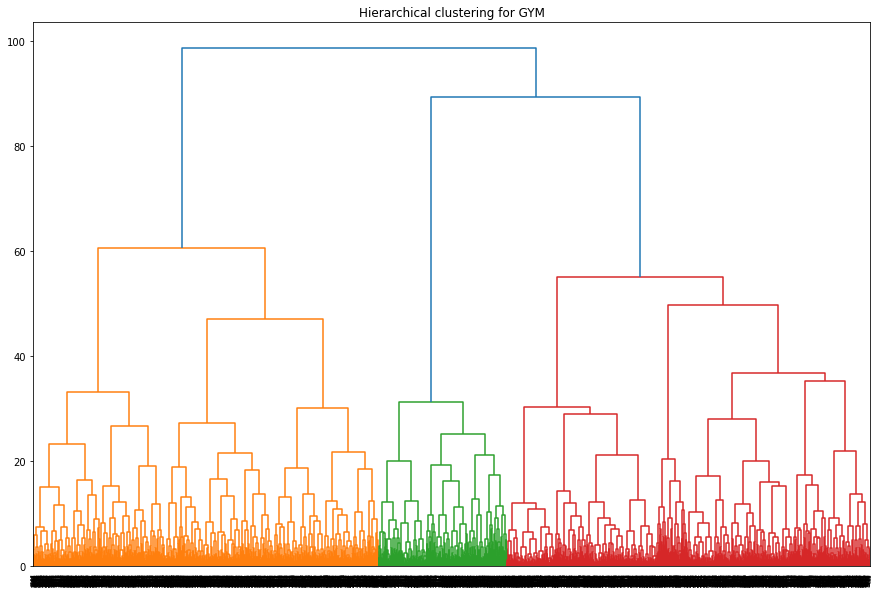

In [19]:
#plotting dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show();

We see here 3 possible clusters. But let's try to make 5 for more detailed analysis.

In [20]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5, random_state=0)
# predict the clusters for observations 
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
gym_predict['cluster_km'] = labels

# calculating the silhouette score for the clustering
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.16


The silhouette score is relatively low. Let's examine the churn rate and the feature means and attempt to create a profile of the average users within each cluster.

In [21]:
#calculating churn percentage for each cluster
churn = gym_predict.groupby('cluster_km')['churn'].mean().map('{:.0%}'.format).reset_index()
churn

,cluster_km,churn
0,0,40%
1,1,27%
2,2,13%
3,3,48%
4,4,1%


Cluster 3 has the highest churn rate, with 48% of its members churning, while cluster 4 has the lowest churn rate, at 1%.

In [22]:
#creating dataframe with features means divided by clusters
mean_clusters = gym_predict.groupby('cluster_km').mean()
mean_clusters.T

cluster_km,0,1,2,3,4
near_location,0.000000,1.000000,0.996071,1.000000,0.986647
partner,0.490099,0.147472,0.949902,0.198990,0.565282
promo_friends,0.074257,0.098315,1.000000,0.069697,0.047478
contract_period,2.942244,2.814607,7.137525,2.022222,8.412463
group_visits,0.227723,1.000000,0.512770,0.000000,0.410979
age,28.693069,29.155899,29.513752,28.230303,30.559347
avg_additional_charges_total,136.983665,140.531963,151.992438,134.391724,173.483596
lifetime,2.905941,2.771067,4.029470,2.338384,7.044510
avg_class_frequency_current_month,1.596594,1.679171,1.884991,1.429404,2.330966
churn,0.404290,0.273876,0.133595,0.484848,0.007418


If we look at averages and compare clusters with highest and lowest churn rates, we can see:
1. Cluster 3 has the lowest average contract period, which is 2 months, while cluster 4 has the highest, at 8.4 months.
2. On average, members in Cluster 3 are younger, at 28 years, while those in Cluster 4 are older, at 30.5 years.
3. Members in Cluster 3 spend less additional money at the fitness centers, averaging 134USD, while those in Cluster 4 spend more, at 173USD.
4. Cluster 3 has the shortest average lifetime, at 2.3 months, while Cluster 4 has the highest, at 7 months."
5. Cluster 3 has the lowest average frequency of visits per week in the last month, at 1.4 times, while Cluster 4 has the highest, with a record of 2.3 times a week.

Despite the observed clear trend, we've noticed that the inclusion of a large number of features has made our clusters a bit blurry. Some clusters exhibit contradictory characteristics in terms of churn rate, while being similar in other aspects (and other way around). For example, members in Cluster 0 do not live nearby and have a 40% churn rate, while Cluster 3 members live near the fitness center and have a churn rate of 48%. While the difference in churn rate isn't significant, it's opposite in terms of proximity to the fitness center.
We've also noticed similar issues with other features in different clusters. 

Therefore, we propose narrowing down the list of features to obtain a clearer understanding of our members' user profiles in relation to churn. We will focus on those features that have the highest correlation with churn in the correlation matrix.

In [23]:
#creating dataset with the most relevant features
gym_predict_clean = gym[['contract_period', 
                         'age', 
                         'avg_additional_charges_total', 
                         'lifetime', 
                         'avg_class_frequency_current_month', 
                         'churn']]

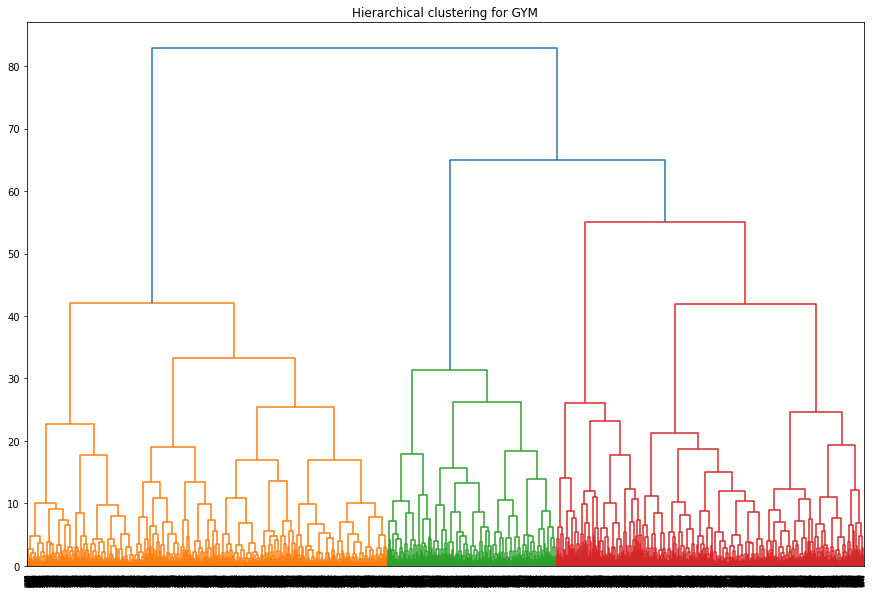

In [24]:
# dropping the churn indicator
clusterization_clean = gym_predict_clean.drop('churn', axis = 1)

# standardizing data 
sc_clean = StandardScaler()
x_sc_clean = sc_clean.fit_transform(clusterization_clean)
linked_clean = linkage(x_sc_clean, method = 'ward') 

#plotting dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked_clean, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show();

Here we also see 3 clusters, but let's make it 5 in order to be able to compare results. 

In [25]:
# define the k_means model with 5 clusters
km_clean = KMeans(n_clusters = 5, random_state=0)
# predict the clusters for observations 
labels_clean = km_clean.fit_predict(x_sc_clean)

# store cluster labels in the field of our dataset
gym_predict_clean['cluster_km'] = labels_clean

print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc_clean, labels_clean)))

/tmp/ipykernel_193/3888844101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_predict_clean['cluster_km'] = labels_clean


Silhouette_score: 0.20


The silhouette score is better for this round of clustering!

In [26]:
#calculating churn percentage for each cluster
churn_clean = gym_predict_clean.groupby('cluster_km')['churn'].mean().map('{:.0%}'.format).reset_index()
churn_clean

,cluster_km,churn
0,0,0%
1,1,15%
2,2,12%
3,3,2%
4,4,71%


This time, we have clear leaders in both categories. Cluster 0 represents the most loyal customers with a churn rate of 0%, while cluster 4 represents members who are at risk of leaving, with a churn rate of 71%. Now, we can explore the features that indicate whether a customer is loyal or requires immediate attention.

Let's examine the feature means for the clusters to describe the average customer who will stay versus the one who will leave.

In [27]:
#creating dataframe with features means divided by clusters
mean_clusters_clean = gym_predict_clean.groupby('cluster_km').mean()
mean_clusters_clean.T

cluster_km,0,1,2,3,4
contract_period,5.362924,2.988006,2.574557,11.992762,1.950947
age,29.605744,29.676162,31.182482,29.951749,26.566265
avg_additional_charges_total,150.556774,274.687202,96.382274,159.042804,105.523423
lifetime,12.399478,3.193403,3.232534,3.691194,1.600688
avg_class_frequency_current_month,2.098456,1.889102,2.347258,2.011604,0.934447
churn,0.000000,0.145427,0.120959,0.021713,0.714286


So who is leaving? Cluster 4!
* Those who wouldn't commit to a long contract (average contract period is around 2 months).
* Those who are relatively young (average age is 26 years old).
* Those who have just started coming to the fitness center, newcomers (average lifetime is 1.6 months).
* Those who are visiting the fitness center rarely in the last month (average frequency of visits per week is less than 1).
* Those who spend less (the average amount spent on additional services is 105 USD.<br> 

But as we already noted we believe that data on spending should be collected on a monthly basis (not for the entire period of membership) because customers typically spend less during one- or three-month memberships compared to those with memberships lasting over one year.

And who is staying? Clusters 0 and 3!

* Those who are committed to a long membership (average contract period for Cluster 0 is 5 months, and for Cluster 3, it's 12 months).
* Those who are older (average age is 29 years old).
* Those who have been with us for a while now (average lifetime for Cluster 0 is 12 months, and for Cluster 3, it's around 4 months).
* Those who visit the fitness center at least 2 times a week in the last month

Let's compare the distributions of clusters whose members are staying with the cluster whose members are leaving.

In [28]:
#creating datasets with staying and leaving clusters
churning_cluster = gym_predict_clean.query('cluster_km==4')
staying_cluster = gym_predict_clean.query('cluster_km==0 or cluster_km==3')

In [29]:
#ajusting the function
def distribution_3(df_1, df_2):
    for i in df_1.columns:
        if i in values:
            print('The distribution of: {}'.format(i))
            print('Loyal clients')
            print(df_1[i].value_counts(normalize=True).map('{:.0%}'.format))
            print('Churning clients')
            print(df_2[i].value_counts(normalize=True).map('{:.0%}'.format))
            print('-------------------------------------------------------------------------------------')
        elif i in hist:
            print('The histogram of: {}'.format(i))
            sns.histplot(df_1[i], color = 'green', alpha = 0.5, label = 'Loyal')
            sns.histplot(df_2[i], color = 'red', alpha = 0.5, label = 'Churning')
            plt.legend()
            plt.show()
            print('--------------------------------------------------------------------------------------');

The distribution of: contract_period
Loyal clients
12    77%
1     14%
6      9%
Name: contract_period, dtype: object
Churning clients
1     82%
6     17%
12     1%
Name: contract_period, dtype: object
-------------------------------------------------------------------------------------
The histogram of: age


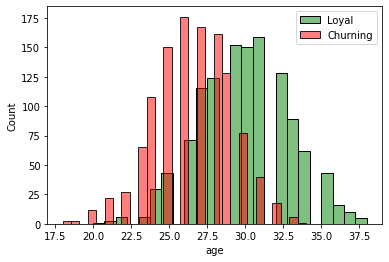

--------------------------------------------------------------------------------------
The histogram of: avg_additional_charges_total


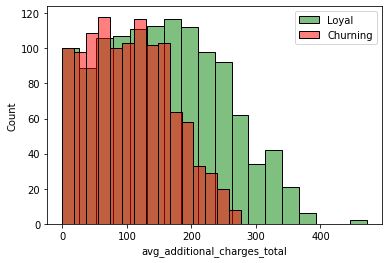

--------------------------------------------------------------------------------------
The histogram of: lifetime


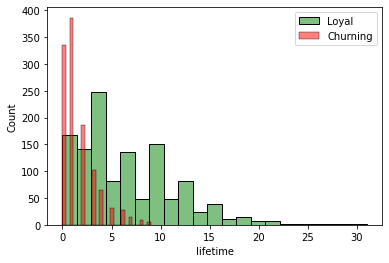

--------------------------------------------------------------------------------------
The histogram of: avg_class_frequency_current_month


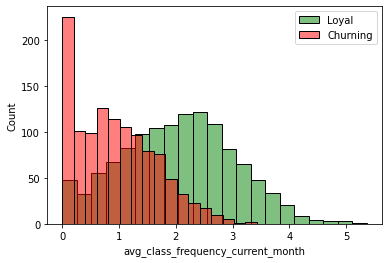

--------------------------------------------------------------------------------------
The distribution of: churn
Loyal clients
0    99%
1     1%
Name: churn, dtype: object
Churning clients
1    71%
0    29%
Name: churn, dtype: object
-------------------------------------------------------------------------------------


In [30]:
distribution_3(staying_cluster, churning_cluster)

What do we see here?

1. 77% of loyal customers sign up for a 12-month membership, while 82% of those leaving sign up for a one-month membership.
2. The age range for leaving customers is from 18 to 34 years old, with most of them being younger than 28. The age range for loyal customers is from 20 to 38 years old, with most of them being younger than 32.
3. The additional charges for loyal customers can exceed 400 USD, while for churned customers, this number does not exceed 280 USD.
4. The lifetime of churned customers does not exceed 9 months, while for loyal customers, it goes up to 30 months.
5. The average frequency of visits per week in the last month for staying customers is up to 5 times a week, with most of them visiting less than 2.8 times. For churning customers, it's up to 3.5 times a week, with most of them visiting less than 1.4 times, and there's a disturbingly large number of customers who are not visiting at all.

## Conclusion

The gym chain Model Fitness wanted to apply data analysis to develop customer interaction strategy.<br>
First step on this path was to analyze customer's churn.<br>
Our task as analytics was to 
   1. explore the data 
   2. come up with a customer retention strategy.

We had a dataset that consists of 4000 rows and 14 columns representing information on 4000 customers that included:
`gender`<br>
`Near_Location` — whether the user lives or works in the neighborhood where the gym is located<br>
`Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)<br>
`Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)<br>
`Phone` — whether the user provided their phone number<br>
`Age`<br>
`Lifetime` — the time (in months) since the customer first came to the gym<br>
`Contract_period` — 1 month, 3 months, 6 months, or 1 year<br>
`Month_to_end_contract` — the months remaining until the contract expires<br>
`Group_visits` — whether the user takes part in group sessions<br>
`Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime<br>
`Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month<br>
`Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.<br>
`Churn` — the fact of churn for the month in question<br>


First of all, to gain insights into our customers, we conducted an analysis of the general distribution of all the presented features. Next, we compared the feature distributions between customers who stayed and those who left to understand the key differences between these two groups. Finally, we utilized a correlation matrix to identify the features most strongly associated with churn and those that had no significant impact.

Next, we proceeded with predictions. To ensure that features did not influence the prediction model, we chose to exclude certain features that exhibited high correlation with each other. Additionally, we excluded features that showed zero correlation with churn. As a result, the features selected for training our prediction model were:<br>
`near_location`<br>
`partner`<br>
`promo_friends`<br>
`contract_period`<br>
`group_visits`<br>
`age`<br>
`avg_additional_charges_total`<br>
`lifetime`<br>
`avg_class_frequency_current_month`<br>


We used two prediction models to predict customer's churn - LogisticRegression and RandomForestClassifier.
And both of them achieved a 90% accuracy rate, meaning that 90% of the predictions were correct. However, precision was higher for Random Forest, while recall was better for Logistic Regression.
Since our primary interest lies in predicting customer churn, we should select the model whose metric indicates fewer false negative predictions – those cases where customers were predicted to stay but actually churned. In this context, recall becomes the key metric to consider, and Logistic Regression is our chosen model.

To proactively identify customers who may leave us, we used a clustering algorithm that segmented our dataset into five distinct clusters. We achieved the most meaningful results when we refined our feature selection, concentrating on those attributes with the highest correlation to churn as indicated in the correlation matrix

From the five clusters, Cluster 4 exhibited the highest churn rate at 71%, while Clusters 0 and 3 had the lowest churn rates, at 0% and 2%, respectively. Analyzing these clusters allowed us to create distinct profiles for users likely to churn and those likely to remain.

So, who is going to leave?
* Those who wouldn't commit to a long contract (average contract period is around 2 months).
* Those who are relatively young (average age is 26 years old).
* Those who have just started coming to the fitness center, newcomers (average lifetime is 1.6 months).
* Those who are visiting the fitness center rarely in the last month (average frequency of visits per week is less than 1).

And who is going to stay? Clusters 0 and 3!

* Those who are committed to a long membership (average contract period for Cluster 0 is 5 months, and for Cluster 3, it's 12 months).
* Those who are older (average age is 29 years old).
* Those who have been with us for a while now (average lifetime for Cluster 0 is 12 months, and for Cluster 3, it's around 4 months).
* Those who visit the fitness center at least 2 times a week in the last month.

### Recomendation

So now that we've identified our high-risk customers, we would like to recommend several marketing strategies to reduce churn:

1. Encourage at-risk customers to commit to longer contract periods by implementing a system of appealing discounts that increase with the duration of the signed contract.

2. Pay special attention to newcomers by offering onboarding workshops, sessions, or free nutritional guidance. Maintain continuous communication, for example, through a visits rating system.

3. Encourage more frequent visits, potentially through personalized fitness plans, or introduce a system of collecting points for frequent visits that can be redeemed at the center's sports store or fitness cafe.

4. Offer targeted promotions and discounts to incentivize customers high-risk customers to stay and engage more with our fitness center.

By implementing these recommendations, Model Fitness can enhance its customer retention strategies and reduce churn, ultimately creating a more satisfied and loyal member base.
